<a href="https://colab.research.google.com/github/sangitaGIT011/Myproj/blob/main/Car_Ride.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

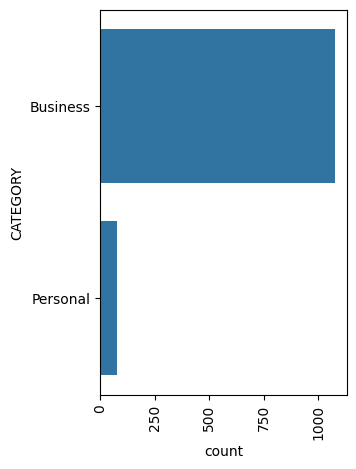

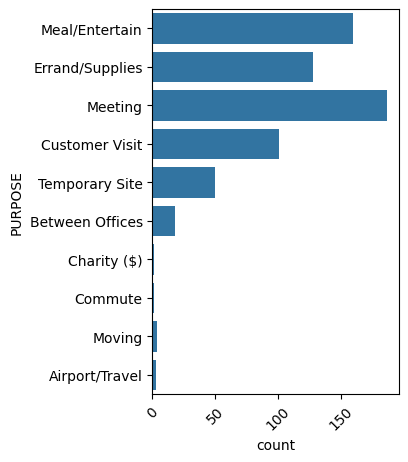

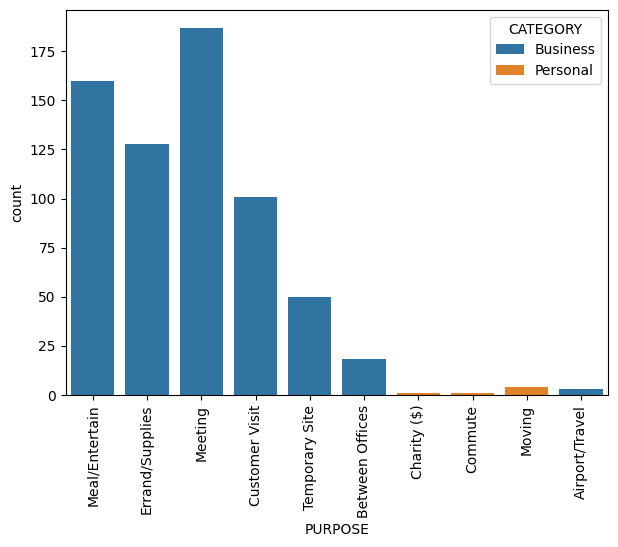

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("https://raw.githubusercontent.com/sangitaGIT011/Myproj/refs/heads/main/UberDataset.csv")
dataset.head()
#dataset.shape

#dataset.info()


#dataset['PURPOSE'] = dataset['PURPOSE'].fillna("NOT")

#dataset.fillna(0, inplace=True)


#dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
                                       #errors='coerce')
#dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
                                     #errors='coerce')



obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values


plt.figure(figsize=(7,5))

plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)


plt.figure(figsize=(7, 5))
plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=45)







plt.figure(figsize=(7, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()


from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)


